In [2]:
# import sys
# IN_COLAB = 'google.colab' in sys.modules

# if IN_COLAB:
#     !pip install deriva
#     !pip install bdbag
#     !pip install --upgrade --force pydantic
#     !pip install git+https://github.com/informatics-isi-edu/deriva-ml git+https://github.com/informatics-isi-edu/eye-ai-ml

In [3]:
repo_dir = "Repos"   # Set this to be where your github repos are located.
%load_ext autoreload
%autoreload 2

# Update the load path so python can find modules for the model
import sys
from pathlib import Path
sys.path.insert(0, str(Path.home() / repo_dir / "eye-ai-ml"))

In [4]:
# Prerequisites

import json
import os
from eye_ai.eye_ai import EyeAI
import pandas as pd
from pathlib import Path, PurePath
import logging
# import torch

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True)

In [5]:

from deriva.core.utils.globus_auth_utils import GlobusNativeLogin
catalog_id = "eye-ai" #@param
host = 'www.eye-ai.org'


gnl = GlobusNativeLogin(host=host)
if gnl.is_logged_in([host]):
    print("You are already logged in.")
else:
    gnl.login([host], no_local_server=True, no_browser=True, refresh_tokens=True, update_bdbag_keychain=True)
    print("Login Successful")

2024-06-27 15:49:57,340 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-27 15:49:57,341 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


You are already logged in.


In [6]:
# Variables to configure the rest of the notebook.

cache_dir = '/data'        # Directory in which to cache materialized BDBags for datasets
working_dir = '/data'    # Directory in which to place output files for later upload.

configuration_rid = "2-C8PJ" # rid
# Change the confi_file with bag_url=["minid: train", "minid: Valid", "minid: test"]



In [7]:
EA = EyeAI(hostname = host, catalog_id = catalog_id, cache_dir= cache_dir, working_dir=working_dir)

2024-06-27 15:49:57,386 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-27 15:49:57,387 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


In [8]:
# @title Initiate an Execution
configuration_records = EA.execution_init(configuration_rid=configuration_rid)
configuration_records.model_dump()

2024-06-27 15:49:57,860 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_angle_sreenidhi_june_27_2024.json] transfer successful. 0.94 KB transferred. Elapsed time: 0:00:00.000097.
2024-06-27 15:49:57,861 - INFO - Verifying MD5 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_angle_sreenidhi_june_27_2024.json]
2024-06-27 15:49:57,881 - INFO - Configuration validation successful!
2024-06-27 15:50:05,873 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json] transfer successful. 0.69 KB transferred. Elapsed time: 0:00:00.000054.
2024-06-27 15:50:05,874 - INFO - Verifying SHA256 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json]
2024-06-27 15:50:06,145 - INFO - File [/dat

{'caching_dir': PosixPath('/data'),
 'working_dir': PosixPath('/data/sreenidhi/EyeAI_working'),
 'vocabs': {'Workflow_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_angle_training',
    'rid': '2-C8PP'}],
  'Execution_Asset_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_angle_training',
    'rid': '2-C8PR'}]},
 'execution_rid': '2-C8QA',
 'workflow_rid': '2-C8PT',
 'bag_paths': [PosixPath('/data/2-277G_6aa1a6861eee5a79bce4bf071065355f95a066c2a1ff326089d43048a7e0f185/Dataset_2-277G'),
  PosixPath('/data/2-277J_81c873a311aa6a67cf2eef44bd9056cb19181b299a6e44327ea3553616f18725/Dataset_2-277J'),
  PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')],
 'assets_paths': [PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'),
  PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/train_no_optic_disc_image_ids.csv'),
  PosixPath('/data/sreenidhi/EyeAI_working/Executio

In [9]:
configuration_records

ConfigurationRecord(caching_dir=PosixPath('/data'), working_dir=PosixPath('/data/sreenidhi/EyeAI_working'), vocabs={'Workflow_Type': [Term(name='VGG19_Catalog_Model_LACDHS_angle_training', rid='2-C8PP')], 'Execution_Asset_Type': [Term(name='VGG19_Catalog_Model_LACDHS_angle_training', rid='2-C8PR')]}, execution_rid='2-C8QA', workflow_rid='2-C8PT', bag_paths=[PosixPath('/data/2-277G_6aa1a6861eee5a79bce4bf071065355f95a066c2a1ff326089d43048a7e0f185/Dataset_2-277G'), PosixPath('/data/2-277J_81c873a311aa6a67cf2eef44bd9056cb19181b299a6e44327ea3553616f18725/Dataset_2-277J'), PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')], assets_paths=[PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'), PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/train_no_optic_disc_image_ids.csv'), PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/valid_no_optic_disc_i

In [10]:
exclude_train = pd.read_csv(configuration_records.assets_paths[1])['ID'].to_list()
exclude_valid = pd.read_csv(configuration_records.assets_paths[2])['ID'].to_list()

In [11]:
import os
import shutil
import pandas as pd
from pathlib import Path

def create_LACDHS_angle_dataset(train_dir: str, validation_dir: str, test_dir: str, output_dir: str, exclude_train: list = [], exclude_valid: list = []) -> tuple:
    """
    Creates a dataset for LACDHS angle classification by organizing images into train, valid, and test folders
    based on their Image_Angle_Vocab.

    Parameters:
    - train_dir (str): Path to the raw train dataset bag.
    - validation_dir (str): Path to the raw validation dataset bag.
    - test_dir (str): Path to the raw test dataset bag.
    - output_dir (str): Path to the output directory where the organized dataset will be created.
    - exclude_train (list): List of image RIDs to exclude from the train set.
    - exclude_valid (list): List of image RIDs to exclude from the validation set.

    Returns:
    - tuple: A tuple containing the paths to the train, validation, and test directories.
    """
    def process_dataset(bag_path: str, output_subdir: str, exclude_list: list = []):
        image_csv_path = os.path.join(bag_path, 'data', 'Image.csv')
        image_df = pd.read_csv(image_csv_path)
        image_root_path = os.path.join(bag_path, 'data', 'assets', 'Image')

        for _, row in image_df.iterrows():
            if row['RID'] not in exclude_list:
                angle = row['Image_Angle_Vocab']
                filename = row['Filename']
                src_path = os.path.join(image_root_path, filename)
                dst_dir = os.path.join(output_dir, output_subdir, angle)
                os.makedirs(dst_dir, exist_ok=True)
                dst_path = os.path.join(dst_dir, filename)
                shutil.copy2(src_path, dst_path)

    # Process train dataset
    process_dataset(train_dir, 'train', exclude_train)

    # Process validation dataset
    process_dataset(validation_dir, 'valid', exclude_valid)

    # Process test dataset
    process_dataset(test_dir, 'test')

    train_path = os.path.join(output_dir, 'train')
    valid_path = os.path.join(output_dir, 'valid')
    test_path = os.path.join(output_dir, 'test')

    return train_path, valid_path, test_path

In [12]:
configuration_records.working_dir

PosixPath('/data/sreenidhi/EyeAI_working')

In [13]:
# @title Data Preprocessing (Filtering Image.csv for just Field_2 Images)
train_dir = configuration_records.bag_paths[0] # path to the raw train dataset
validation_dir = configuration_records.bag_paths[1]
test_dir = configuration_records.bag_paths[2]

exclude_train = pd.read_csv(configuration_records.assets_paths[1])['ID'].to_list()
exclude_valid = pd.read_csv(configuration_records.assets_paths[2])['ID'].to_list()

# Call the create_LACDHS_angle_dataset function
train_path, valid_path, test_path = create_LACDHS_angle_dataset(
    train_dir=str(train_dir),
    validation_dir=str(validation_dir),
    test_dir=str(test_dir),
    output_dir=str(configuration_records.working_dir),
    exclude_train=exclude_train,
    exclude_valid=exclude_valid
)

# Print the paths to verify
print("Train dataset path:", train_path)
print("Validation dataset path:", valid_path)
print("Test dataset path:", test_path)

Train dataset path: /data/sreenidhi/EyeAI_working/train
Validation dataset path: /data/sreenidhi/EyeAI_working/valid
Test dataset path: /data/sreenidhi/EyeAI_working/test


In [14]:
import os

def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

def analyze_lacdhs_angle_dataset(base_path):
    main_folders = ['train', 'valid', 'test']
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nAnalyzing {main_folder} folder:")
        
        total_files = 0
        for angle_folder in os.listdir(main_folder_path):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            if os.path.isdir(angle_folder_path):
                file_count = count_files(angle_folder_path)
                print(f"  {angle_folder}: {file_count} images")
                total_files += file_count
        
        print(f"Total images in {main_folder}: {total_files}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
analyze_lacdhs_angle_dataset(base_path)


Analyzing train folder:
  2SK8: 9505 images
  2SK6: 8996 images
  2SK4: 8666 images
Total images in train: 27167

Analyzing valid folder:
  2SK8: 3175 images
  2SK6: 3002 images
  2SK4: 2887 images
Total images in valid: 9064

Analyzing test folder:
  2SK6: 1094 images
  2SK4: 1042 images
  2SK8: 1152 images
Total images in test: 3288



Visualizing samples from train folder:


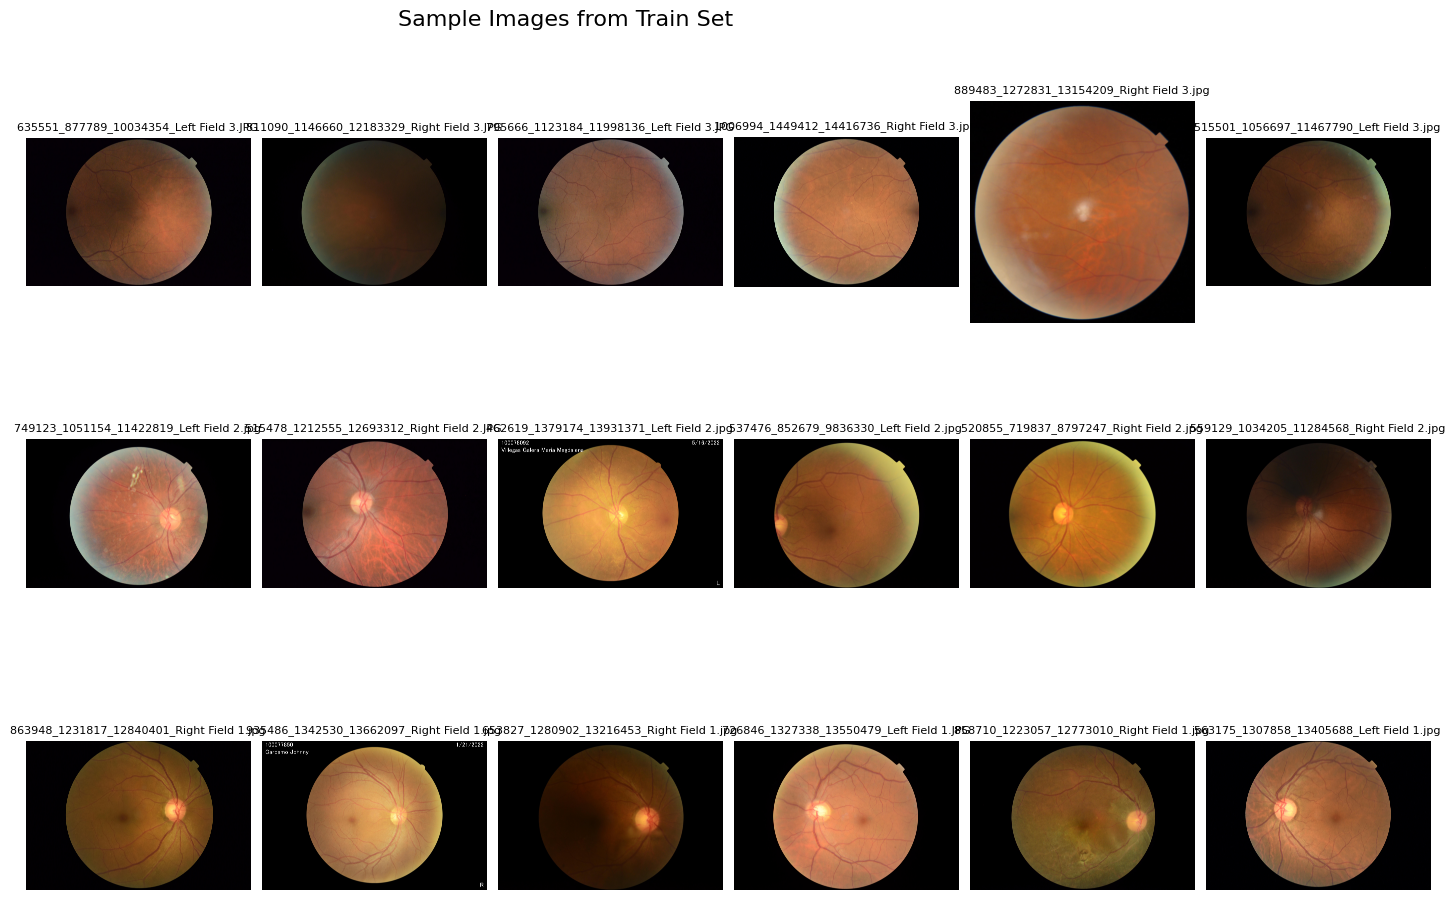

Angles in train set:
  - 2SK8
  - 2SK6
  - 2SK4

Visualizing samples from valid folder:


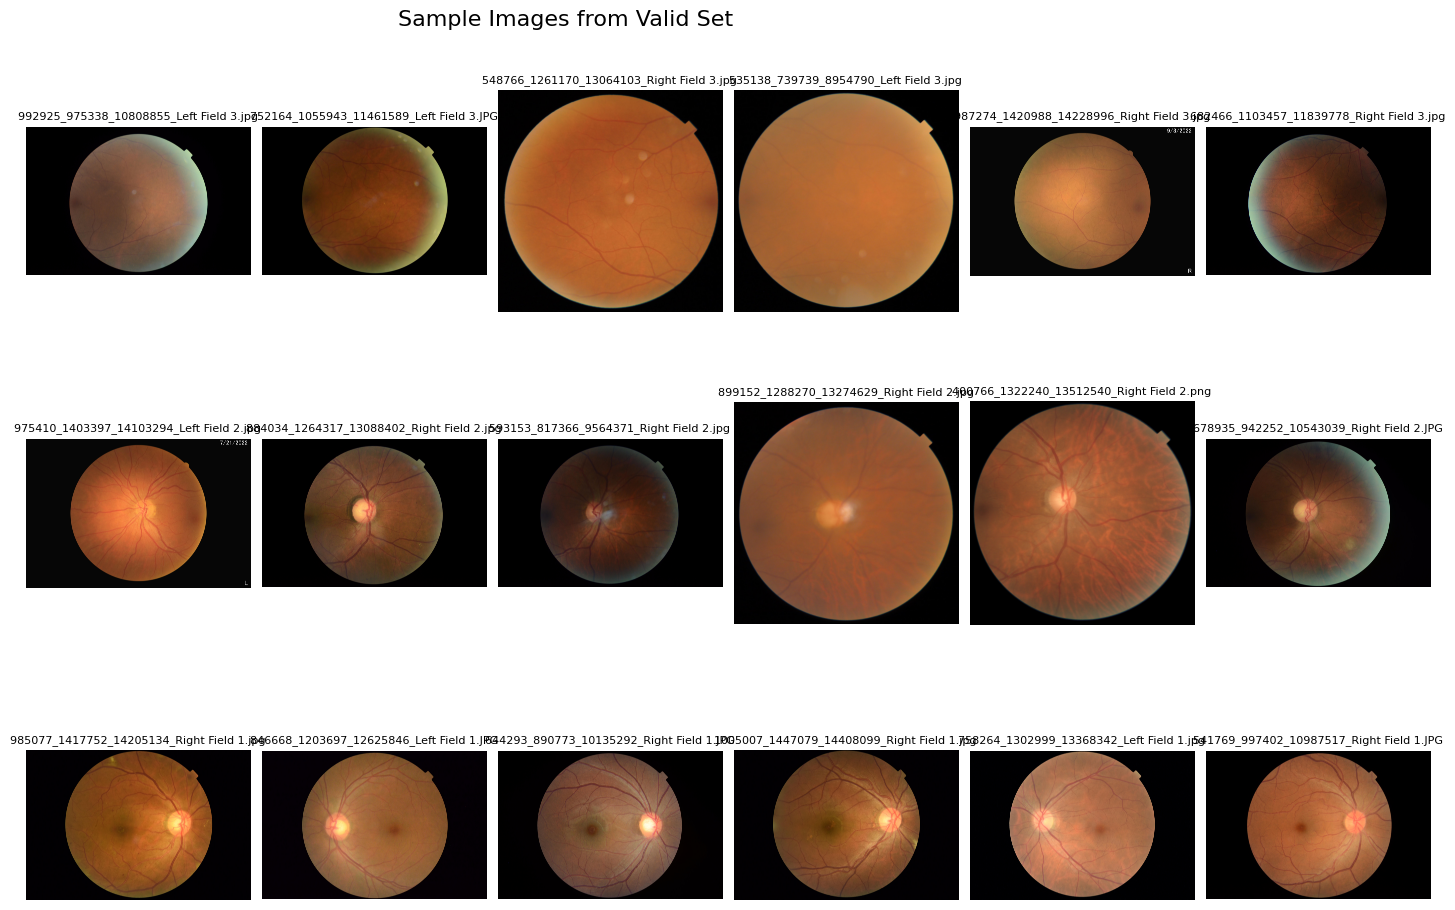

Angles in valid set:
  - 2SK8
  - 2SK6
  - 2SK4

Visualizing samples from test folder:


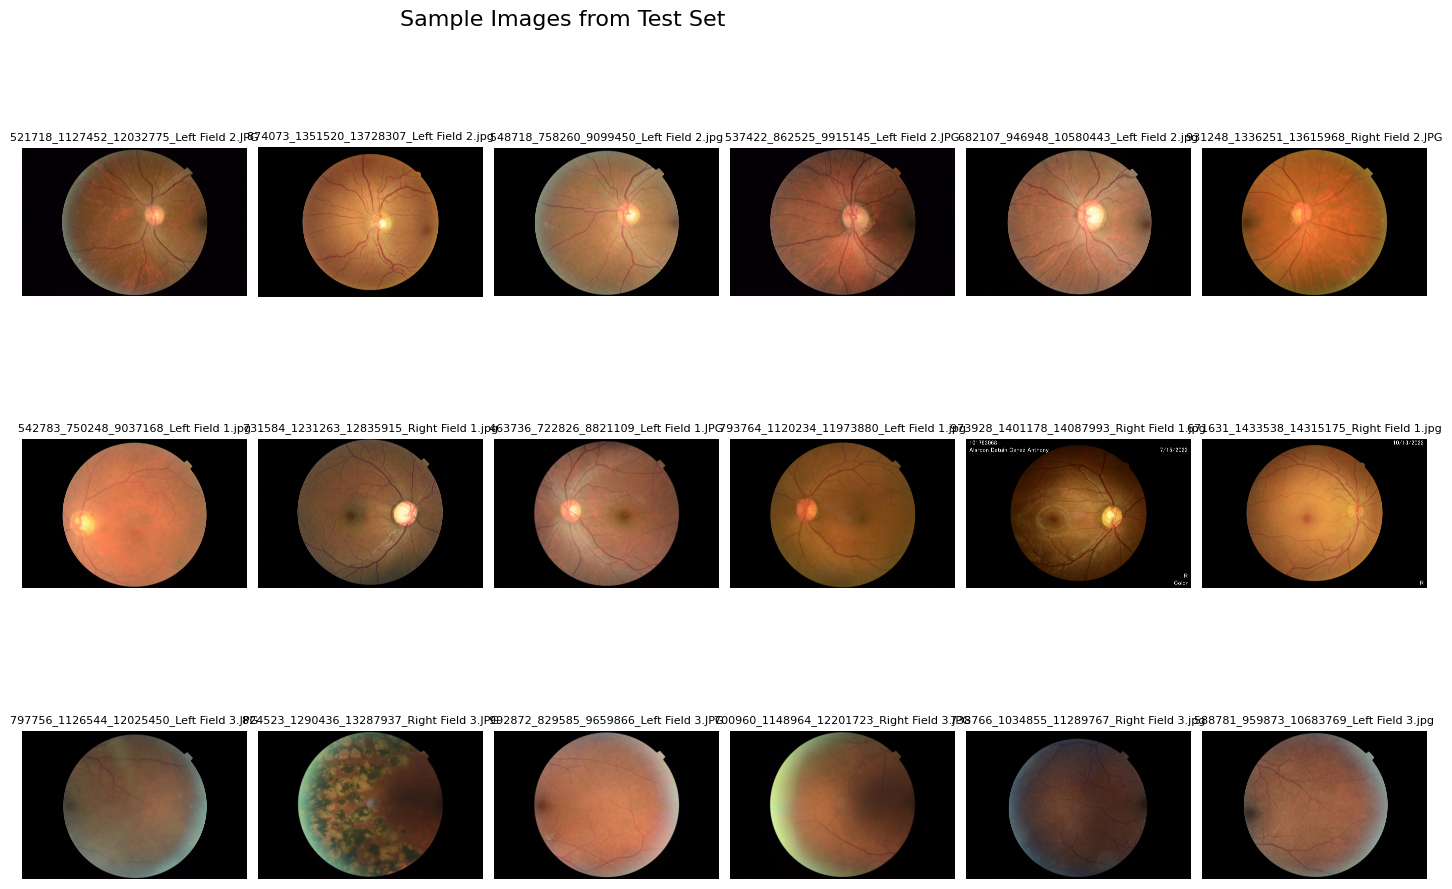

Angles in test set:
  - 2SK6
  - 2SK4
  - 2SK8


In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_lacdhs_angle_dataset(base_path, samples_per_angle=6):
    main_folders = ['train', 'valid', 'test']
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nVisualizing samples from {main_folder} folder:")
        
        angle_folders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]
        
        # Calculate grid size
        n_angles = len(angle_folders)
        n_cols = samples_per_angle
        n_rows = n_angles
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.5))
        fig.suptitle(f'Sample Images from {main_folder.capitalize()} Set', fontsize=16)
        
        for i, angle_folder in enumerate(angle_folders):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            image_files = [f for f in os.listdir(angle_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            if len(image_files) < samples_per_angle:
                print(f"Warning: Not enough images in {angle_folder}. Using all available images.")
                selected_files = image_files
            else:
                selected_files = random.sample(image_files, samples_per_angle)
            
            for j, image_file in enumerate(selected_files):
                img_path = os.path.join(angle_folder_path, image_file)
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                # Add image filename as title for each subplot
                axes[i, j].set_title(image_file, fontsize=8)
                
                if j == 0:
                    axes[i, j].set_ylabel(angle_folder, rotation=0, labelpad=40, va='center', fontsize=10)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.98)
        plt.show()
        
        # Print confirmation of angles
        print(f"Angles in {main_folder} set:")
        for angle in angle_folders:
            print(f"  - {angle}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
visualize_lacdhs_angle_dataset(base_path)

In [16]:

output_path = str(EA.working_dir) + "/Execution_Assets/" + configuration_records.vocabs['Execution_Asset_Type'][0].name
os.mkdir(output_path)

In [17]:
output_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_angle_training'

In [18]:
best_hyper_parameters_json_path = str(configuration_records.assets_paths[0])

In [19]:
best_hyper_parameters_json_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'

In [20]:
import json

# Open and load the JSON file
with open(best_hyper_parameters_json_path, 'r') as file:
    data = json.load(file)

# Print the contents of the JSON file
print(json.dumps(data, indent=4))

{
    "rotation_range": -6,
    "width_shift_range": 0.049283662164352315,
    "height_shift_range": 0.062129040368351915,
    "horizontal_flip": true,
    "vertical_flip": true,
    "zoom_range": -0.03493437617512693,
    "brightness_range": 0.016808387649284325,
    "use_class_weights": true,
    "pooling": "global_average",
    "dense_layers": 2,
    "units_layer_0": 512,
    "activation_func_0": "sigmoid",
    "batch_norm_0": true,
    "dropout_0": 0.10646478371824658,
    "units_layer_1": 64,
    "activation_func_1": "relu",
    "batch_norm_1": false,
    "dropout_1": 0.2830490167548361,
    "fine_tune_at": 0,
    "fine_tuning_learning_rate_adam": 1.1688327470992886e-05,
    "batch_size": 32
}


In [21]:
# @title Execute Training algorithm

from eye_ai.models.vgg19_lacdhs_angle_train import main

with EA.execution(execution_rid=configuration_records.execution_rid) as exec:
  main(train_path=train_path,
       valid_path=valid_path, 
       test_path=test_path, 
       output_path=output_path,
       best_hyperparameters_json_path=best_hyper_parameters_json_path,
       model_name="VGG19_Catalog_LAC_DHS_Angle_Trained_model_June_27_2024"
      )


2024-06-27 15:56:28.893462: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 15:56:28.893521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 15:56:29.040732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 15:56:29.389500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 15:56:31.631954: W tensorflow/compiler/tf2

Found 27167 images belonging to 3 classes.
Found 9064 images belonging to 3 classes.
Found 3288 images belonging to 3 classes.
train_generator.class_indices :  {'2SK6': 0, '2SK4': 1, '2SK8': 2}
validation_generator.class_indices :  {'2SK6': 0, '2SK4': 1, '2SK8': 2}
test_generator.class_indices :  {'2SK6': 0, '2SK4': 1, '2SK8': 2}


2024-06-27 15:56:34.258750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 15:56:34.323533: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 15:56:34.327254: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/100


2024-06-27 15:56:42.187384: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-27 15:56:48.632818: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2101c50360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-27 15:56:48.632873: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2024-06-27 15:56:48.662108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719529008.980904    3267 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


849/849 [==============================] - 652s 742ms/step - loss: 0.2160 - roc_auc_score: 0.9846 - accuracy_score: 0.9374 - f1_score_metric: 0.9338 - val_loss: 0.1410 - val_roc_auc_score: 0.9915 - val_accuracy_score: 0.9614 - val_f1_score_metric: 0.9595
Epoch 2/100
849/849 [==============================] - 638s 746ms/step - loss: 0.1424 - roc_auc_score: 0.9913 - accuracy_score: 0.9607 - f1_score_metric: 0.9587 - val_loss: 0.1268 - val_roc_auc_score: 0.9932 - val_accuracy_score: 0.9628 - val_f1_score_metric: 0.9609
Epoch 3/100
849/849 [==============================] - 629s 739ms/step - loss: 0.1322 - roc_auc_score: 0.9921 - accuracy_score: 0.9626 - f1_score_metric: 0.9605 - val_loss: 0.1183 - val_roc_auc_score: 0.9933 - val_accuracy_score: 0.9652 - val_f1_score_metric: 0.9643
Epoch 4/100
849/849 [==============================] - 637s 744ms/step - loss: 0.1290 - roc_auc_score: 0.9922 - accuracy_score: 0.9639 - f1_score_metric: 0.9616 - val_loss: 0.1048 - val_roc_auc_score: 0.9952 - v

2024-06-27 18:45:55,027 - INFO - Test results - [0.15311826765537262, 0.990042507648468, 0.9638077616691589, 0.9617829322814941]


Model Eval results: [0.15311826765537262, 0.990042507648468, 0.9638077616691589, 0.9617829322814941]
103/103 [==============================] - 126s 1s/step


2024-06-27 18:48:02,504 - INFO - Detailed Classification Report:
2024-06-27 18:48:02,505 - INFO - {
  "2SK6": {
    "precision": 0.3447636700648749,
    "recall": 0.340036563071298,
    "f1-score": 0.3423838011965025,
    "support": 1094.0
  },
  "2SK4": {
    "precision": 0.3226102941176471,
    "recall": 0.33685220729366605,
    "f1-score": 0.3295774647887324,
    "support": 1042.0
  },
  "2SK8": {
    "precision": 0.36931311329170385,
    "recall": 0.359375,
    "f1-score": 0.36427628684557856,
    "support": 1152.0
  },
  "accuracy": 0.3458029197080292,
  "macro avg": {
    "precision": 0.34556235915807526,
    "recall": 0.3454212567883213,
    "f1-score": 0.34541251761027114,
    "support": 3288.0
  },
  "weighted avg": {
    "precision": 0.34634430901265334,
    "recall": 0.3458029197080292,
    "f1-score": 0.3459957053725485,
    "support": 3288.0
  }
}
2024-06-27 18:48:02,510 - INFO - Macro F1 Score: 0.34541251761027114
2024-06-27 18:48:02,510 - INFO - Weighted F1 Score: 0.3459

In [26]:
# @title Execute Evaluation algorithm
from eye_ai.models.vgg19_lacdhs_angle_predict import evaluate_model
with EA.execution(execution_rid=configuration_records.execution_rid) as exec:
    evaluate_model(
        model_path=output_path + '/VGG19_Catalog_LAC_DHS_Angle_Trained_model_June_27_2024.h5',
        test_path=test_path,
        output_path=output_path,
        best_params={"batch_size" : 32}
    )

Found 3288 images belonging to 3 classes.
103/103 [==============================] - 124s 1s/step - loss: 0.1531 - roc_auc_score: 0.9900 - accuracy_score: 0.9638 - f1_score_metric: 0.6642


2024-06-27 19:06:34,073 - INFO - loss: 0.1531183421611786
2024-06-27 19:06:34,073 - INFO - roc_auc_score: 0.990042507648468
2024-06-27 19:06:34,074 - INFO - accuracy_score: 0.9638077616691589
2024-06-27 19:06:34,075 - INFO - f1_score_metric: 0.6641936302185059


loss: 0.1531183421611786
roc_auc_score: 0.990042507648468
accuracy_score: 0.9638077616691589
f1_score_metric: 0.6641936302185059
103/103 [==============================] - 122s 1s/step


2024-06-27 19:08:37,768 - INFO - 
Detailed Metrics:
2024-06-27 19:08:37,769 - INFO - Accuracy: 0.9638077858880778
2024-06-27 19:08:37,769 - INFO - Macro Precision: 0.9637315146632845
2024-06-27 19:08:37,770 - INFO - Macro Recall: 0.9642512303842579
2024-06-27 19:08:37,770 - INFO - Macro F1 Score: 0.9637676826330474
2024-06-27 19:08:37,771 - INFO - Weighted F1 Score: 0.9638869393693003
2024-06-27 19:08:37,786 - INFO - Classification Report:
2024-06-27 19:08:37,787 - INFO - {
  "2SK6": {
    "precision": 0.9805375347544022,
    "recall": 0.9670932358318098,
    "f1-score": 0.9737689829728486,
    "support": 1094.0
  },
  "2SK4": {
    "precision": 0.9347426470588235,
    "recall": 0.9760076775431862,
    "f1-score": 0.9549295774647887,
    "support": 1042.0
  },
  "2SK8": {
    "precision": 0.975914362176628,
    "recall": 0.9496527777777778,
    "f1-score": 0.9626044874615046,
    "support": 1152.0
  },
  "accuracy": 0.9638077858880778,
  "macro avg": {
    "precision": 0.96373151466328


Detailed Metrics:
Accuracy: 0.9638077858880778
Macro Precision: 0.9637315146632845
Macro Recall: 0.9642512303842579
Macro F1 Score: 0.9637676826330474
Weighted F1 Score: 0.9638869393693003

Classification Report:
              precision    recall  f1-score   support

        2SK6       0.98      0.97      0.97      1094
        2SK4       0.93      0.98      0.95      1042
        2SK8       0.98      0.95      0.96      1152

    accuracy                           0.96      3288
   macro avg       0.96      0.96      0.96      3288
weighted avg       0.96      0.96      0.96      3288

Macro-averaged ROC AUC: 0.9918613850402694
Predictions saved to angle_predictions.csv
Confusion matrix saved as confusion_matrix.png (300 DPI)
ROC curves saved as roc_curves.png (300 DPI)


In [27]:
# # @title Save Execution Assets (model) and Metadata
uploaded_assets = EA.execution_upload(configuration_records.execution_rid, True)

2024-06-27 19:08:53,779 - INFO - Initializing uploader: GenericUploader v1.7.1 [Python 3.10.13, Linux-5.10.210-201.852.amzn2.x86_64-x86_64-with-glibc2.26]
2024-06-27 19:08:53,780 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-27 19:08:53,781 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>
2024-06-27 19:08:53,820 - INFO - Checking for updated configuration...
2024-06-27 19:08:53,919 - INFO - Updated configuration found.
2024-06-27 19:08:53,922 - INFO - Scanning files in directory [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_angle_training]...
2024-06-27 19:08:53,926 - INFO - Including file: [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_angle_training/VGG19_Catalog_LAC_DHS_Angle_Trained_model_June_27_2024.h5].
2024-06-27 19: